# Random Forests

One tree, two tree, red tree random forest.

## What we will accomplish

In this notebook we will:
- Describe the random forest model,
- Mention how we introduce random perturbations to a decision tree,
- Extend the random forest idea to an extra trees model and
- Demonstrate how random forest models can be used for feature importance.

In [1]:
## For data handling
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
from seaborn import set_style

## This sets the plot style
## to have a grid on a white background
set_style("whitegrid")

## Forests are many trees

The <i>random forest</i> model is made by building many different decision trees. These trees are made "different" through a variety of random perturbations (more on this later in the notebook). Random forests are thus an ensemble of decision tree models.

We will demonstrate the advantages of this ensemble with the synthetic data set we used in our decision tree classification notebook.

In [2]:
np.random.seed(4930)

X = np.zeros((200,2))
X[:,0] = np.random.random(200)
X[:,1] = np.random.random(200)

y = np.zeros(200)
y[X[:,0]-X[:,1]>=0] = 1

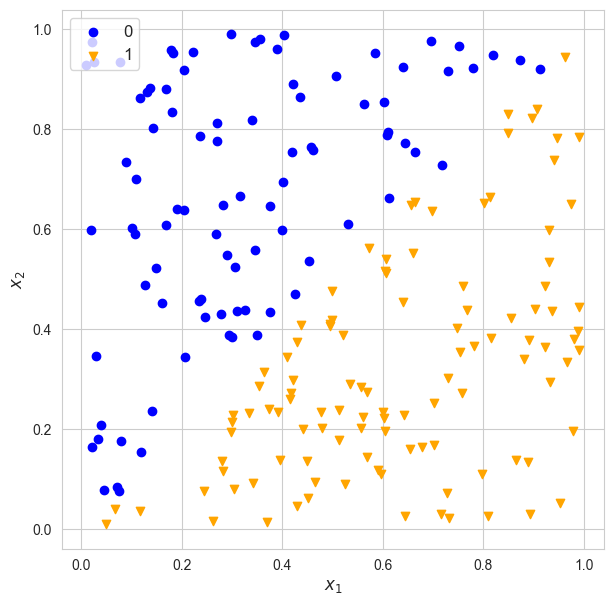

In [3]:
plt.figure(figsize = (7,7))

plt.scatter(X[y == 0,0], 
            X[y == 0,1],
            c='blue',
            label="0")
plt.scatter(X[y == 1,0], 
            X[y == 1,1],
            c='orange',
            marker='v',
            label="1")
plt.xlabel("$x_1$",fontsize = 12)
plt.ylabel("$x_2$",fontsize = 12)
plt.legend(fontsize=12, loc=2)

plt.show()

Let's compare the decision boundaries produced on these data with a decision tree of maximum depth 2, and a random forest of trees with maximum depth 2. In `sklearn` we can make a random forest classifier with `RandomForestClassifier`, <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html">https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html</a>.

In [4]:
## import model objects
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [5]:
## Make model objects

## decision tree
## we've seen this before
tree = DecisionTreeClassifier(max_depth = 2)

## random forest
## n_estimators determines the number of tree
## each tree has the same hyperparameters as the DecisionTreeClassifier
## we set a random_state to make sure that our fits are the same
## max_depth comes from the decision tree
rf = RandomForestClassifier(n_estimators=100,
                            max_depth=2,
                            random_state=101)


In [6]:
## Fit the models
rf.fit(X, y)
tree.fit(X, y)

## rf may take slightly longer because we are fitting many trees


DecisionTreeClassifier(max_depth=2)

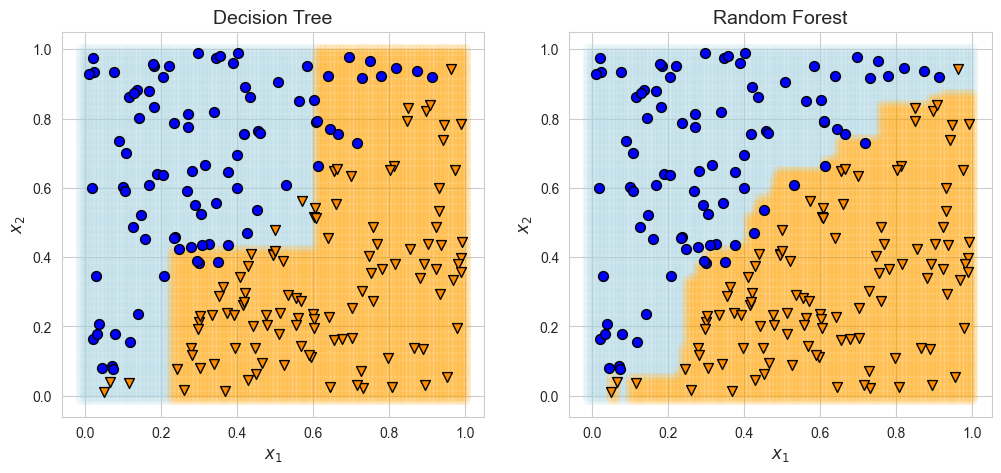

In [7]:
## Demonstrating

## Making a grid for the decision boundaries
xx1, xx2 = np.meshgrid(np.arange(-.01, 1.01, .01),
                          np.arange(-.01, 1.01, .01))

X_pred = np.zeros((len(xx1.reshape(-1,1)), 2))
X_pred[:,0] = xx1.flatten()
X_pred[:,1] = xx2.flatten()

tree_preds = tree.predict(X_pred)
rf_preds = rf.predict(X_pred)


s = 50
fig,ax = plt.subplots(1,2,figsize=(12,5))

ax[0].scatter(X_pred[tree_preds==0,0],
            X_pred[tree_preds==0,1],
            alpha=.1,
            c='lightblue',
            s=s)

ax[0].scatter(X_pred[tree_preds==1,0],
            X_pred[tree_preds==1,1],
            alpha=.1,
            c='orange',
            s=s)

ax[0].scatter(X[y==0,0], 
            X[y==0,1],
            label='Training 0',
            c = 'blue',
            edgecolor='black',
            s=s)
ax[0].scatter(X[y==1,0], 
            X[y==1,1],
            label='Training 1',
            c = 'darkorange',
            edgecolor='black',
            marker = 'v',
            s=s)


ax[1].scatter(X_pred[rf_preds==0,0],
            X_pred[rf_preds==0,1],
            alpha=.1,
            c='lightblue',
            s=s)
ax[1].scatter(X_pred[rf_preds==1,0],
            X_pred[rf_preds==1,1],
            alpha=.1,
            c='orange',
            s=s)

ax[1].scatter(X[y==0,0], 
            X[y==0,1],
            label='Training 0',
            c = 'blue',
            edgecolor='black',
            s=s)
ax[1].scatter(X[y==1,0], 
            X[y==1,1],
            label='Training 1',
            c = 'darkorange',
            marker = 'v',
            edgecolor='black',
            s=s)

ax[0].set_title("Decision Tree", fontsize=14)
ax[1].set_title("Random Forest", fontsize=14)

ax[0].set_xlabel("$x_1$", fontsize=12)
ax[1].set_xlabel("$x_1$", fontsize=12)

ax[0].set_ylabel("$x_2$", fontsize=12)
ax[1].set_ylabel("$x_2$", fontsize=12)

plt.show()

## How to plant trees

So what is `sklearn` doing when we train a random forest? 

We already know that it is somehow building many decision trees with random perturbations and then averaging the results, but how does it build those trees?

There are a number of ways that can be done.

### Sampling subsets of the training data


One way is to randomly sample training points <b>with replacement</b> from the data set, then train the algorithm on the randomly sampled set. Note that this is the default for `sklearn`'s decision trees, it can be controlled with the hyperparameter `bootstrap` a value of `True` takes a random subset, a value of `False` trains each tree with the entire data set. So if your training set has $n$ points, the algorithm randomly samples $n$ points with replacement (note this is the default it can be changed to be less than the entire dataset using `max_samples`) then trains a decision tree on it. 

Random Forests train `n_estimators` (an input to the `sklearn` method) independent trees. The default is $100$ trees, but this can be changed.

This process of randomly selecting subsets of the data with replacement is more generally known as <i>bagging</i>, which we'll return to in the more general ensemble learning notebook. 

### Randomly selecting predictors

In addition to the ability to randomly sample data, every decision tree is built on a random sample of the features of the data. This means that unlike in a single decision tree where the best cut is chosen from all of the features at each step, we limit ourselves to which features we consider. 

Also just like in decision trees you can control the maxinum number of features considered in your model with the hyperparameter `max_features`.

#####  A note on hyperparameters

Compared to all of the algorithms we have examined this far random forests have the most hyperparameters to think about. Depending on the settings you choose for the algorithm, you could wind up with vastly different predictions. It is always important to put thought into why you choose a particular hyperparameter value.

### Extra-trees

If you were sitting there thinking that you'd like to make this process even more random, you are in luck.

An extension of random forests is know as extra-trees. This algorithm is just like a random forest, but in addition to randomly selecting a handful of features to optimize it also randomly selects the cutpoints instead of having the tree search for the optimal one.

This algorithm is faster random forests, but does tend to have a little more bias. Typically you will have to build both classifiers and compare measures via cross-validation to decide if an extra-trees classifier is better than a standard random forest.

This algorithm can be enacted using `ExtraTreesClassifier` from `sklearn`, <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html">https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html</a>.

In [8]:
## import ExtraTreesClassifier here
from sklearn.ensemble import ExtraTreesClassifier

In [10]:
## Make a model object
et = ExtraTreesClassifier(n_estimators=100,
                         max_depth=2)

## fit the model object
et.fit(X, y)

ExtraTreesClassifier(max_depth=2)

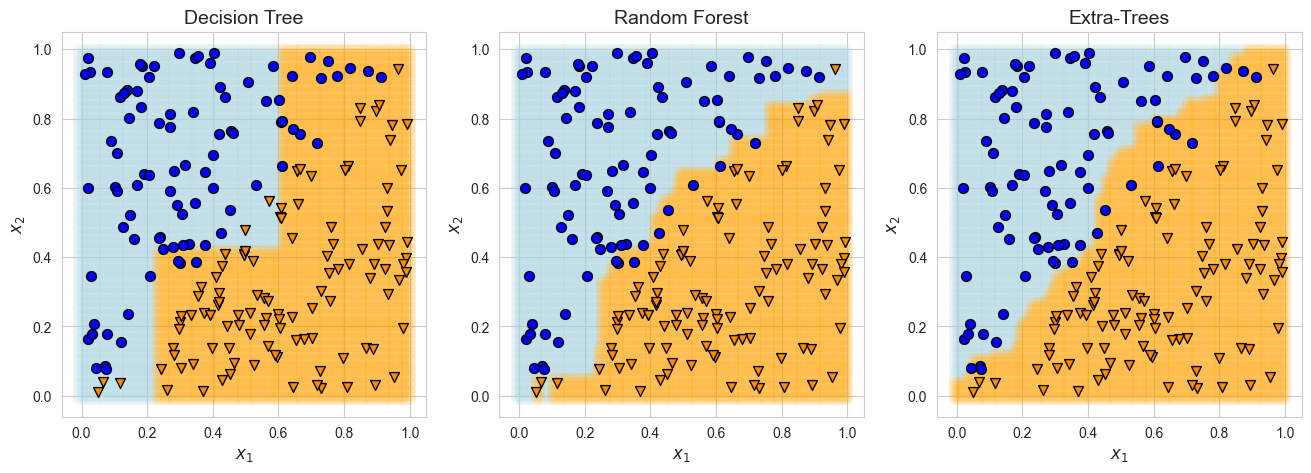

In [11]:
## Demonstrating

## Making a grid for the decision boundaries
et_preds = et.predict(X_pred)


s = 50
fig,ax = plt.subplots(1,3,figsize=(16,5))

ax[0].scatter(X_pred[tree_preds==0,0],
            X_pred[tree_preds==0,1],
            alpha=.1,
            c='lightblue',
            s=s)

ax[0].scatter(X_pred[tree_preds==1,0],
            X_pred[tree_preds==1,1],
            alpha=.1,
            c='orange',
            s=s)

ax[0].scatter(X[y==0,0], 
            X[y==0,1],
            label='Training 0',
            c = 'blue',
            edgecolor='black',
            s=s)
ax[0].scatter(X[y==1,0], 
            X[y==1,1],
            label='Training 1',
            c = 'darkorange',
            edgecolor='black',
            marker = 'v',
            s=s)


ax[1].scatter(X_pred[rf_preds==0,0],
            X_pred[rf_preds==0,1],
            alpha=.1,
            c='lightblue',
            s=s)
ax[1].scatter(X_pred[rf_preds==1,0],
            X_pred[rf_preds==1,1],
            alpha=.1,
            c='orange',
            s=s)

ax[1].scatter(X[y==0,0], 
            X[y==0,1],
            label='Training 0',
            c = 'blue',
            edgecolor='black',
            s=s)
ax[1].scatter(X[y==1,0], 
            X[y==1,1],
            label='Training 1',
            c = 'darkorange',
            marker = 'v',
            edgecolor='black',
            s=s)

ax[2].scatter(X_pred[et_preds==0,0],
            X_pred[et_preds==0,1],
            alpha=.1,
            c='lightblue',
            s=s)
ax[2].scatter(X_pred[et_preds==1,0],
            X_pred[et_preds==1,1],
            alpha=.1,
            c='orange',
            s=s)

ax[2].scatter(X[y==0,0], 
            X[y==0,1],
            label='Training 0',
            c = 'blue',
            edgecolor='black',
            s=s)
ax[2].scatter(X[y==1,0], 
            X[y==1,1],
            label='Training 1',
            c = 'darkorange',
            marker = 'v',
            edgecolor='black',
            s=s)

ax[0].set_title("Decision Tree", fontsize=14)
ax[1].set_title("Random Forest", fontsize=14)
ax[2].set_title("Extra-Trees", fontsize=14)


ax[0].set_xlabel("$x_1$", fontsize=12)
ax[1].set_xlabel("$x_1$", fontsize=12)
ax[2].set_xlabel("$x_1$", fontsize=12)


ax[0].set_ylabel("$x_2$", fontsize=12)
ax[1].set_ylabel("$x_2$", fontsize=12)
ax[2].set_ylabel("$x_2$", fontsize=12)


plt.show()

## Random forest for feature importances

Random forests can also provide feature importance scores. 

The `sklearn` algorithm measures importance in the following way. For each feature it looks at every tree and identifies the nodes using that feature to make a cut. It then measures how much those cuts reduced impurity and averages that value over all the trees in the forest. After getting the average impurity reduction for each feature, `sklearn` scales the results so that the sum of all feature importances is equal to $1$.

We will demonstrate this on the `iris` data set.

In [12]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [13]:
iris = load_iris(as_frame=True)

X = iris['data']
X = X.rename(columns={'sepal length (cm)':'sepal_length',
                         'sepal width (cm)':'sepal_width',
                         'petal length (cm)':'petal_length',
                         'petal width (cm)':'petal_width'})
y = iris['target']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X.copy(),y.copy(),
                                                       shuffle=True,
                                                       random_state=153,
                                                       stratify=y,
                                                       test_size=.2)

In [15]:
forest = RandomForestClassifier(n_estimators=500, max_depth=4)

forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, n_estimators=500)

The `sklearn` scaled impurity reduction can be found with `feature_importances_`.

In [16]:
forest.feature_importances_

array([0.09130431, 0.02137882, 0.48437136, 0.4029455 ])

We can make it a little more readable with a dataframe.

In [17]:
score_df = pd.DataFrame({'feature':X_train.columns,
                            'importance_score': forest.feature_importances_})

score_df.sort_values('importance_score',ascending=False)

,feature,importance_score
2,petal_length,0.484371
3,petal_width,0.402946
0,sepal_length,0.091304
1,sepal_width,0.021379


This is a nice feature of random forests, it allows us to understand what variables are most important, which can help us explain the algorithm. It is also useful as another method for feature selection.

##### Extra Trees

Extra trees classifiers also has the ability to be used for feature importance scores.

In [18]:
et = ExtraTreesClassifier(n_estimators=500, max_depth=4)

et.fit(X_train, y_train)

ExtraTreesClassifier(max_depth=4, n_estimators=500)

In [19]:
et_score_df = pd.DataFrame({'feature':X_train.columns,
                            'importance_score': et.feature_importances_})

et_score_df.sort_values('importance_score',ascending=False)

,feature,importance_score
3,petal_width,0.439151
2,petal_length,0.410980
0,sepal_length,0.095472
1,sepal_width,0.054397


--------------------------

This notebook was written for the Erd&#337;s Institute C&#337;de Data Science Boot Camp by Matthew Osborne, Ph. D., 2023.

Any potential redistributors must seek and receive permission from Matthew Tyler Osborne, Ph.D. prior to redistribution. Redistribution of the material contained in this repository is conditional on acknowledgement of Matthew Tyler Osborne, Ph.D.'s original authorship and sponsorship of the Erdős Institute as subject to the license (see License.md)